In [1]:
# Import wymaganych bibliotek
import kagglehub
import pandas as pd

# Pobranie najnowszej wersji bazy danych
print("Pobieranie bazy danych...")
dataset_path = kagglehub.dataset_download("saurabhshahane/music-dataset-1950-to-2019")

# Wyświetlenie ścieżki do pobranej bazy
print("Ścieżka do plików datasetu:", dataset_path)

# Ścieżka do pliku CSV
file_path = f"{dataset_path}/tcc_ceds_music.csv"  # Zmień nazwę pliku, jeśli jest inna

# Wczytanie danych do DataFrame
print("Wczytywanie danych...")
try:
    df = pd.read_csv(file_path)
    print("Dane wczytane pomyślnie!")
except FileNotFoundError:
    print("Nie znaleziono pliku! Upewnij się, że ścieżka do pliku jest poprawna.")

# Wyświetlenie podstawowych informacji o danych
print("\nPodstawowe informacje o danych:")
print(df.info())

print("\nPierwsze 5 wierszy danych:")
print(df.head())

print("\nKolumny w zbiorze danych:")
print(df.columns.tolist())


/home/filip/pja/inne/PredictMusicGenre/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pobieranie bazy danych...
Ścieżka do plików datasetu: /home/filip/.cache/kagglehub/datasets/saurabhshahane/music-dataset-1950-to-2019/versions/3
Wczytywanie danych...
Dane wczytane pomyślnie!

Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  n

In [2]:
# Usuwanie kolumn
columns_to_remove = ["Unnamed: 0", "artist_name", "track_name", "lyrics", "age"]
df = df.drop(columns=columns_to_remove, errors="ignore")

# Wyświetlenie nazw kolumn po usunięciu
print("\nKolumny po usunięciu:")
print(df.columns.tolist())

# Podgląd pierwszych wierszy danych
print("\nPierwsze 5 wierszy po usunięciu kolumn:")
print(df.head())


Kolumny po usunięciu:
['release_date', 'genre', 'len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'topic']

Pierwsze 5 wierszy po usunięciu kolumn:
   release_date genre  len    dating  violence  world/life  night/time  \
0          1950   pop   95  0.000598  0.063746    0.000598    0.000598   
1          1950   pop   51  0.035537  0.096777    0.443435    0.001284   
2          1950   pop   24  0.002770  0.002770    0.002770    0.002770   
3          1950   pop   54  0.048249  0.001548    0.001548    0.001548   
4          1950   pop   48  0.001350  0.001350    0.417772    0.001350   

   shake the audience  family/gospel  romantic  ...  like/girls   sadness  \
0            0.000598       0.048857  0.01710

In [3]:
# Podział danych na zbiory: treningowy i do doszkalania
from sklearn.model_selection import train_test_split

# Podział na zbiory - 70% na trening, 30% na doszkalanie
train_data, fine_tune_data = train_test_split(df, test_size=0.3, random_state=42)

# Wyświetlenie liczby rekordów w poszczególnych zbiorach
print("\nLiczba rekordów w zbiorze treningowym:", len(train_data))
print("Liczba rekordów w zbiorze do doszkalania:", len(fine_tune_data))

# Podstawowe statystyki dla obu zbiorów
print("\nPodstawowe statystyki - Zbiór treningowy:")
print(train_data.describe())

print("\nPodstawowe statystyki - Zbiór do doszkalania:")
print(fine_tune_data.describe())


Liczba rekordów w zbiorze treningowym: 19860
Liczba rekordów w zbiorze do doszkalania: 8512

Podstawowe statystyki - Zbiór treningowy:
       release_date           len        dating      violence    world/life  \
count  19860.000000  19860.000000  19860.000000  19860.000000  19860.000000   
mean    1990.257402     72.755186      0.020861      0.117965      0.120885   
std       18.534731     41.702387      0.051504      0.178660      0.171643   
min     1950.000000      1.000000      0.000291      0.000284      0.000291   
25%     1975.000000     42.000000      0.000923      0.001120      0.001170   
50%     1991.000000     63.000000      0.001462      0.002506      0.006579   
75%     2007.000000     93.000000      0.004049      0.189427      0.199654   
max     2019.000000    199.000000      0.579520      0.981781      0.962105   

         night/time  shake the audience  family/gospel      romantic  \
count  19860.000000        19860.000000   19860.000000  19860.000000   
mean    


Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
Index: 19860 entries, 18123 to 23654
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              19860 non-null  int64  
 1   genre                     19860 non-null  object 
 2   len                       19860 non-null  int64  
 3   dating                    19860 non-null  float64
 4   violence                  19860 non-null  float64
 5   world/life                19860 non-null  float64
 6   night/time                19860 non-null  float64
 7   shake the audience        19860 non-null  float64
 8   family/gospel             19860 non-null  float64
 9   romantic                  19860 non-null  float64
 10  communication             19860 non-null  float64
 11  obscene                   19860 non-null  float64
 12  music                     19860 non-null  float64
 13  movement/places           198

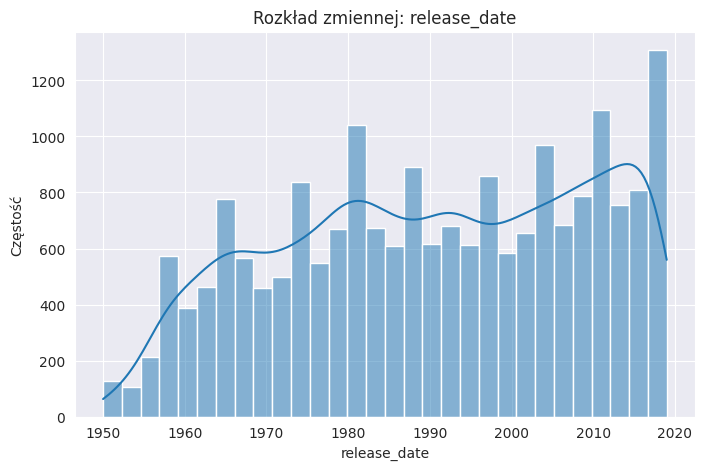

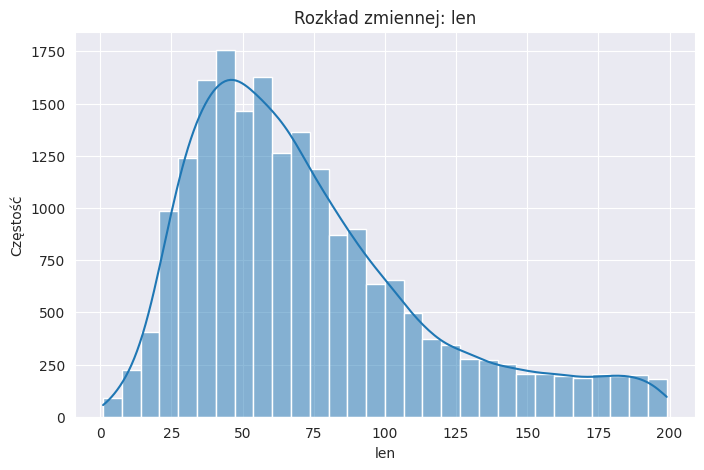

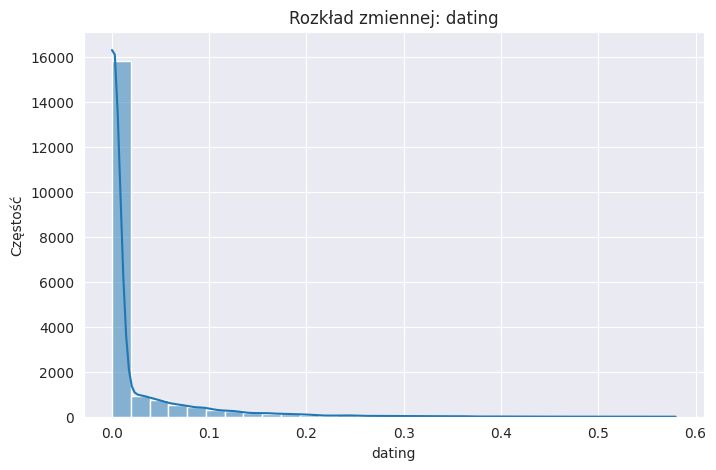

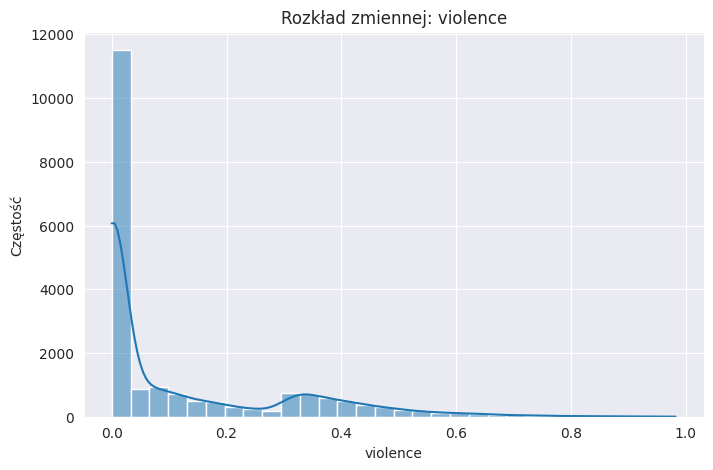

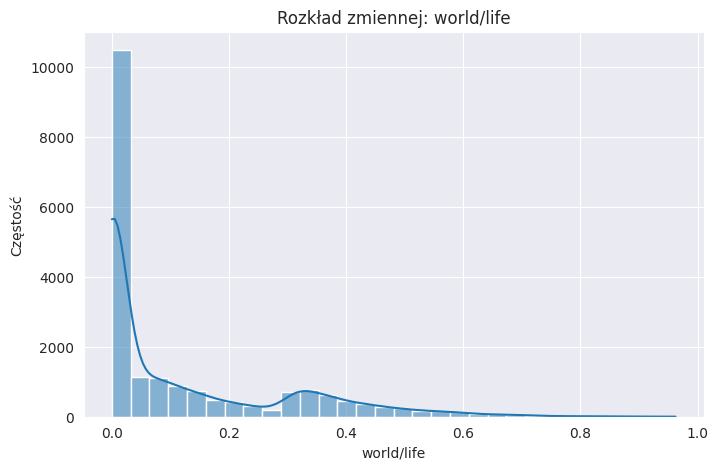

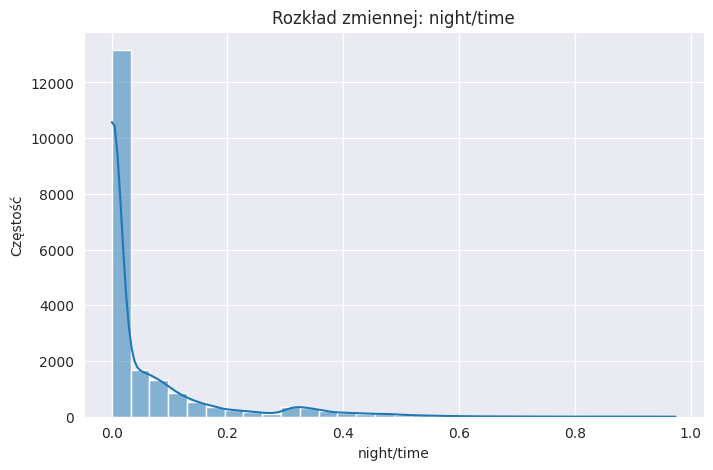

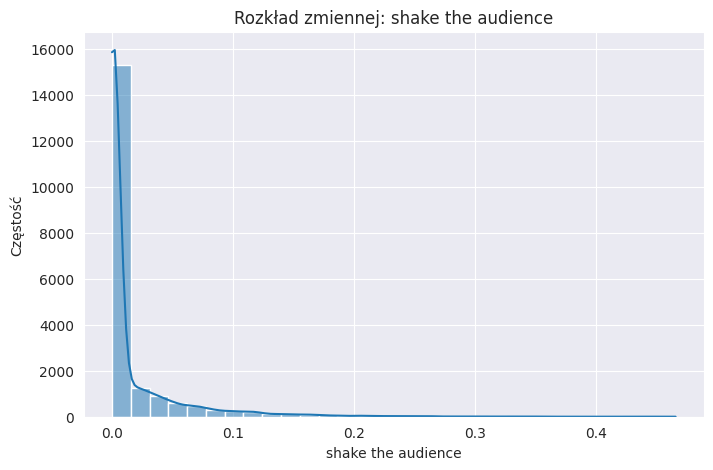

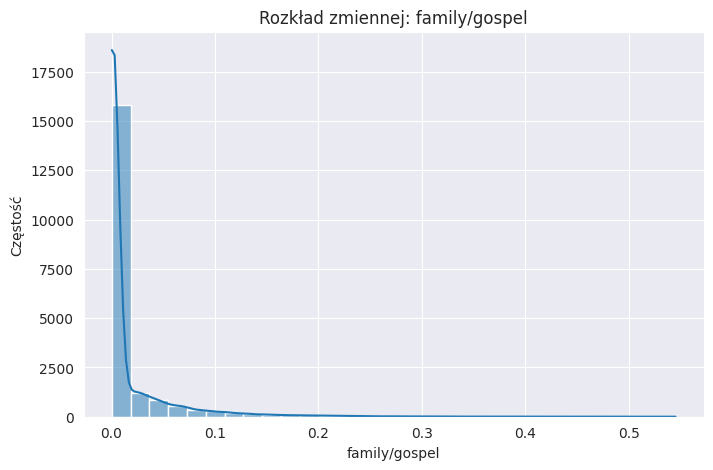

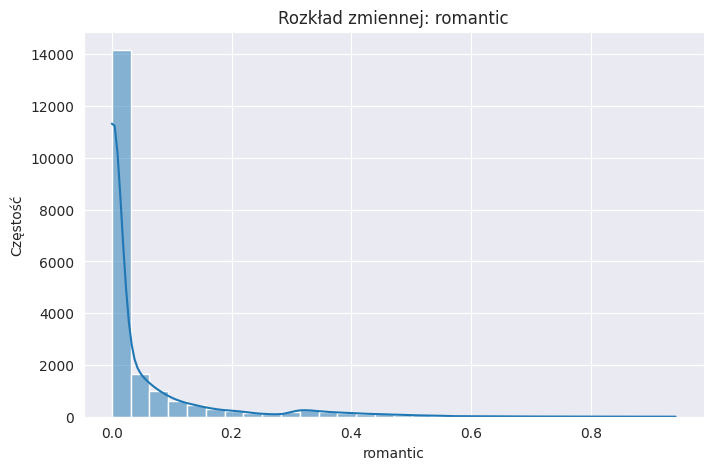

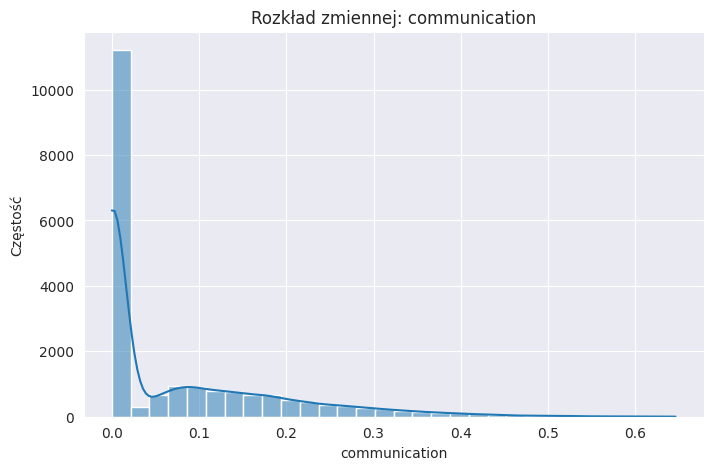

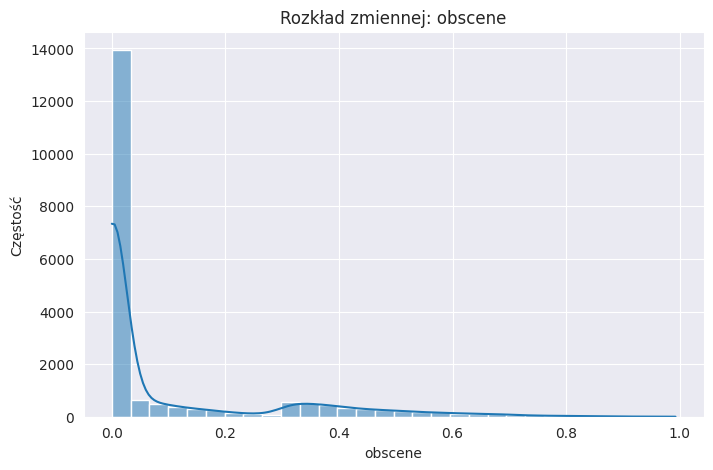

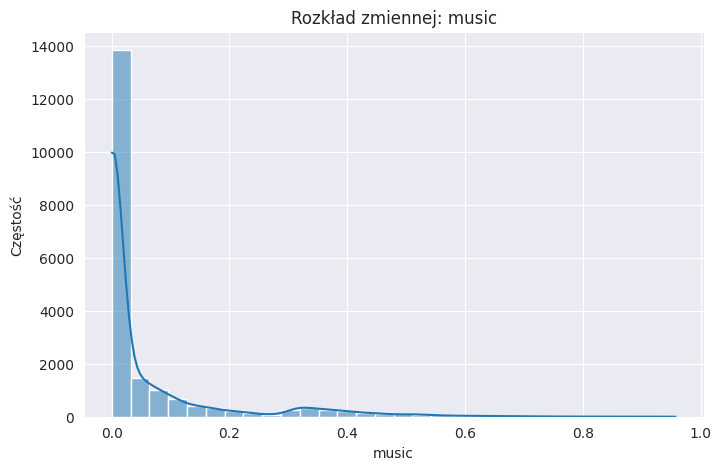

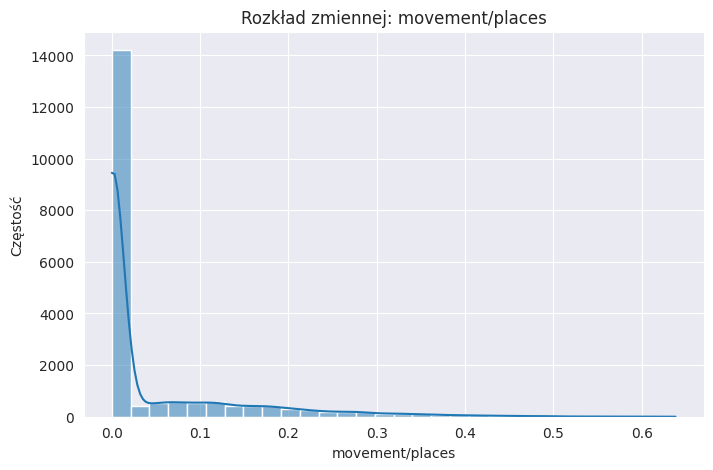

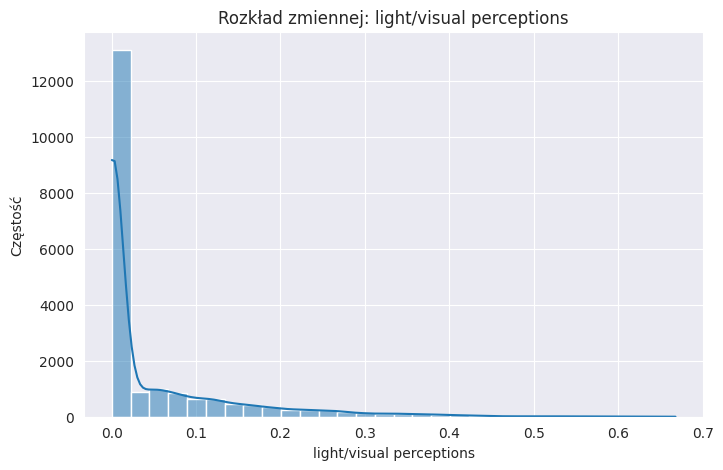

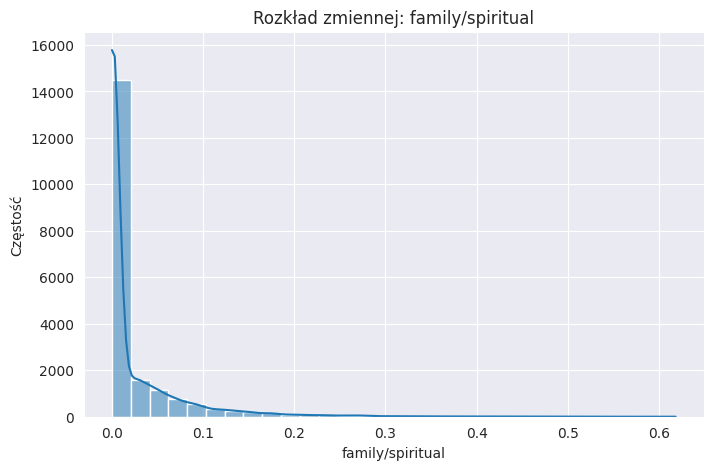

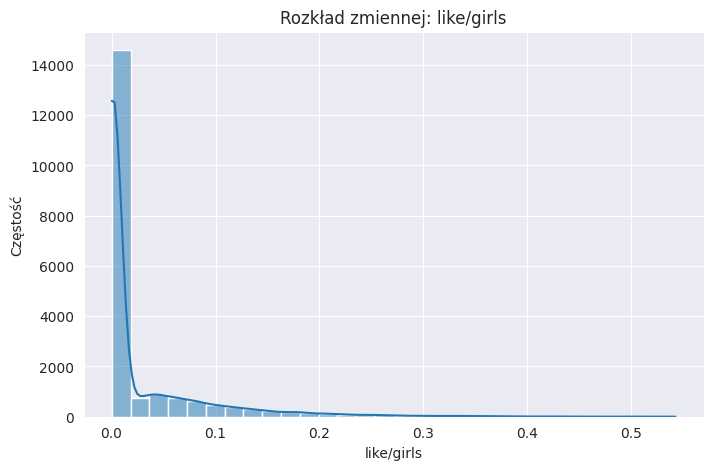

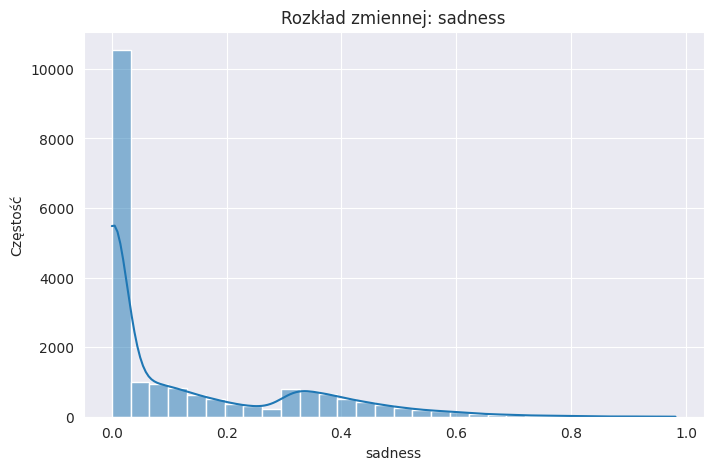

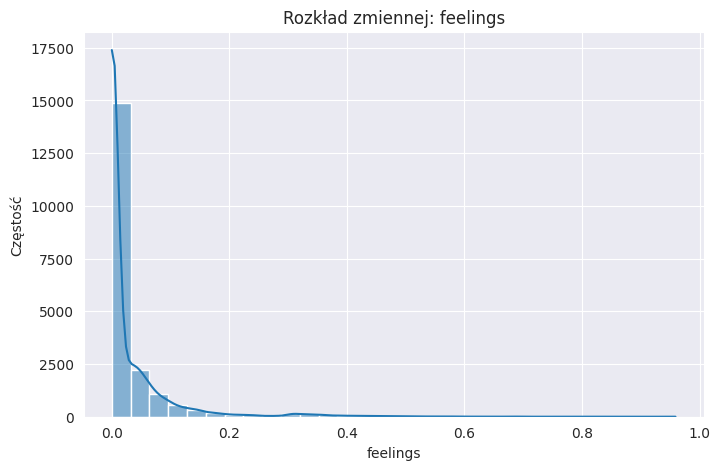

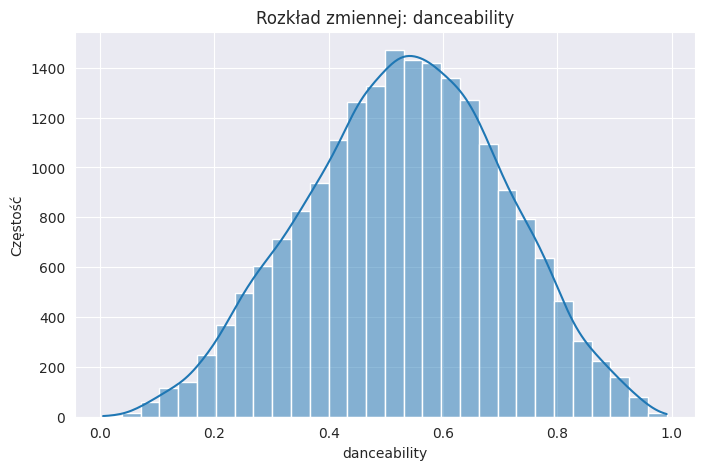

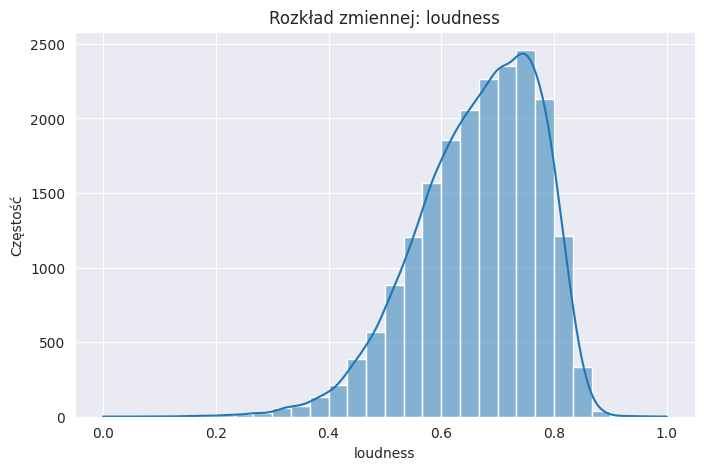

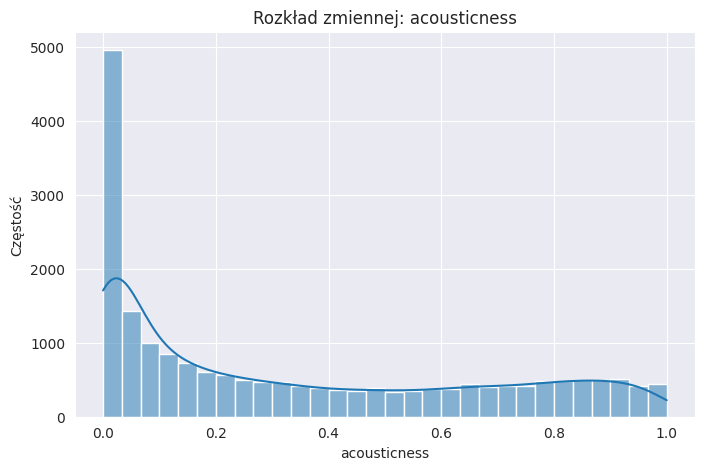

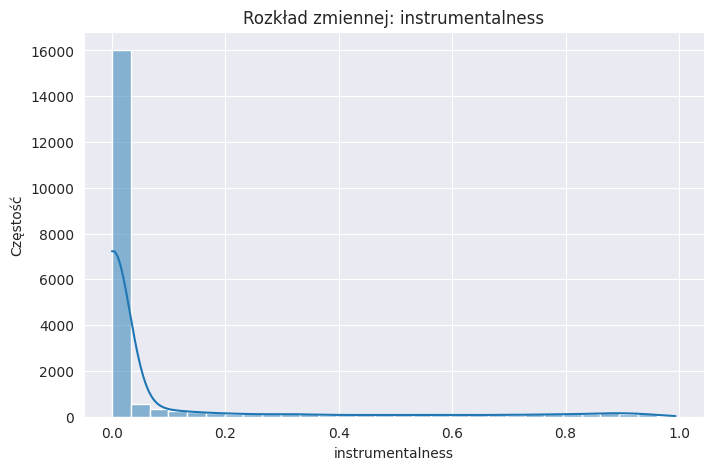

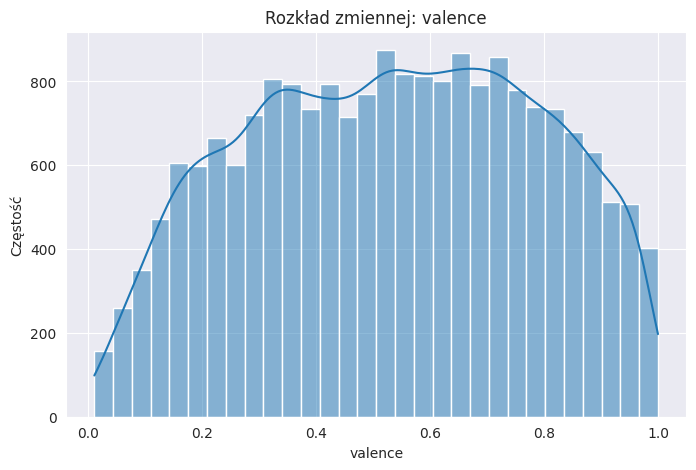

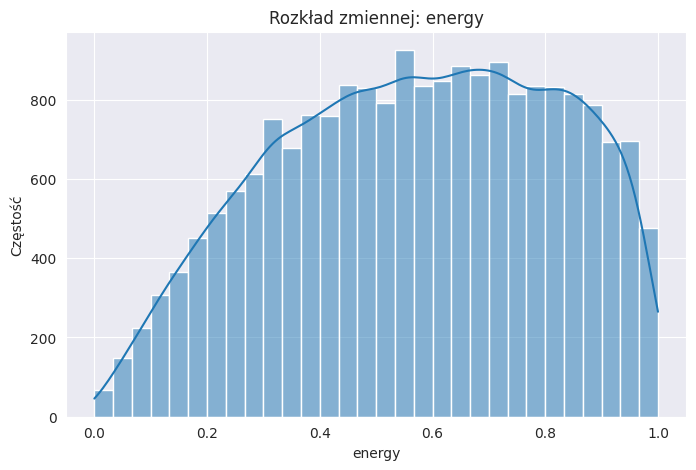


Tworzenie wykresów słupkowych dla zmiennych kategorycznych...


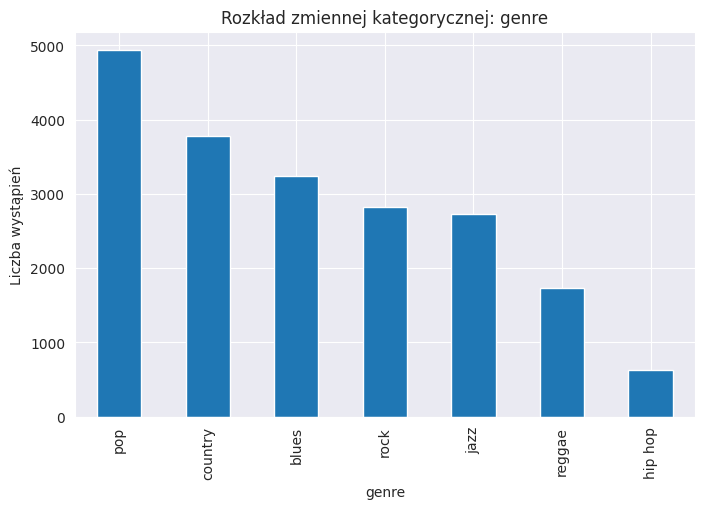

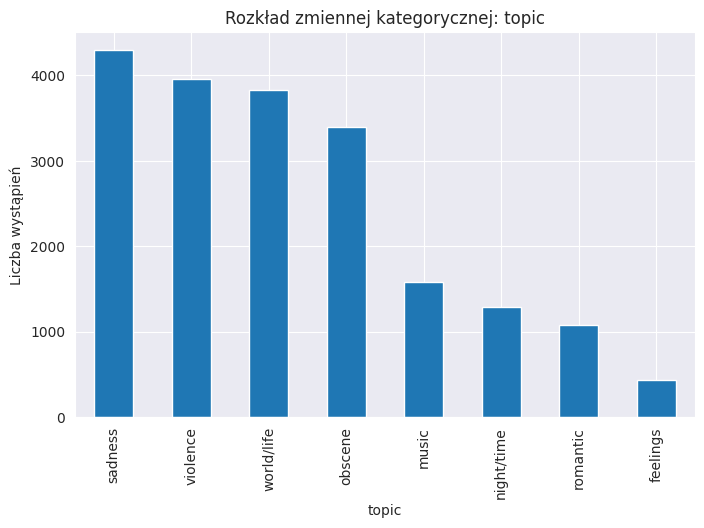


Analiza brakujących danych:
Series([], dtype: int64)


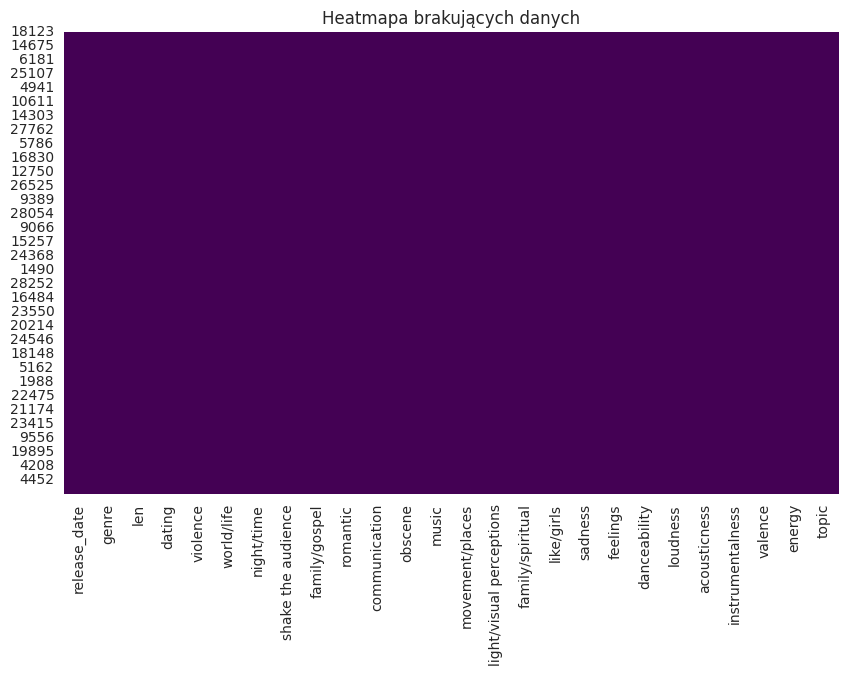


Tworzenie wykresów pudełkowych...


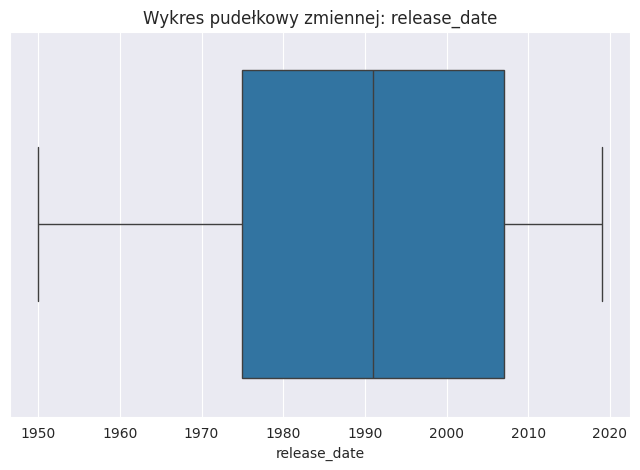

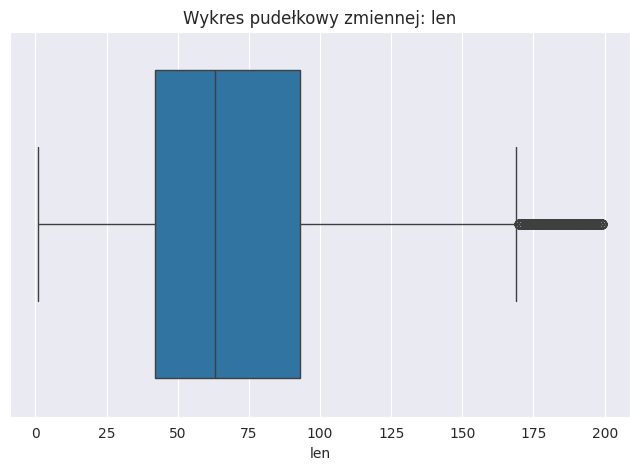

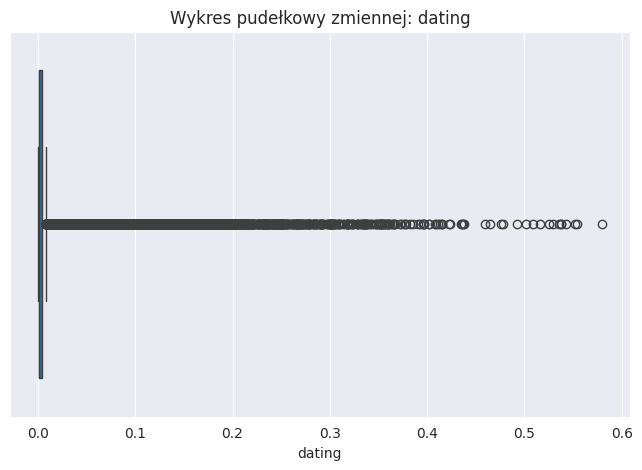

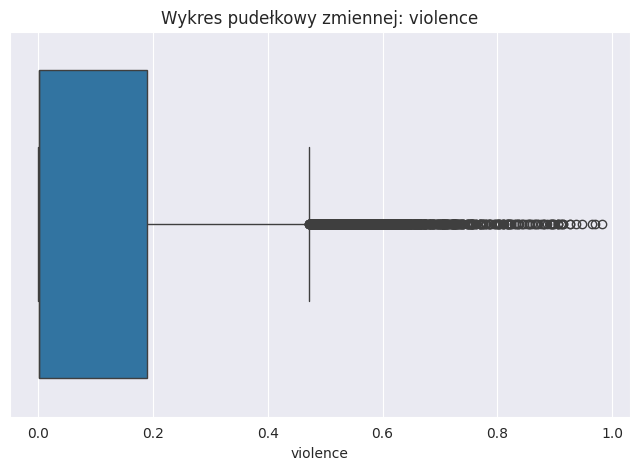

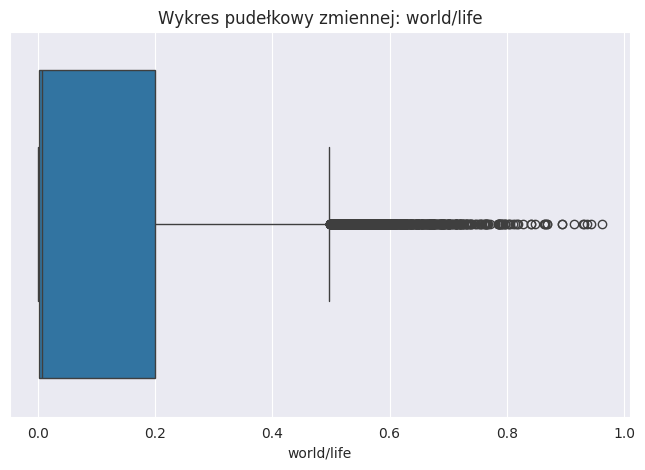

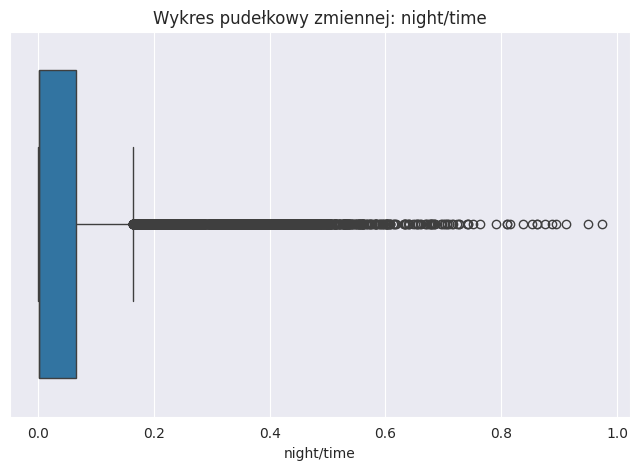

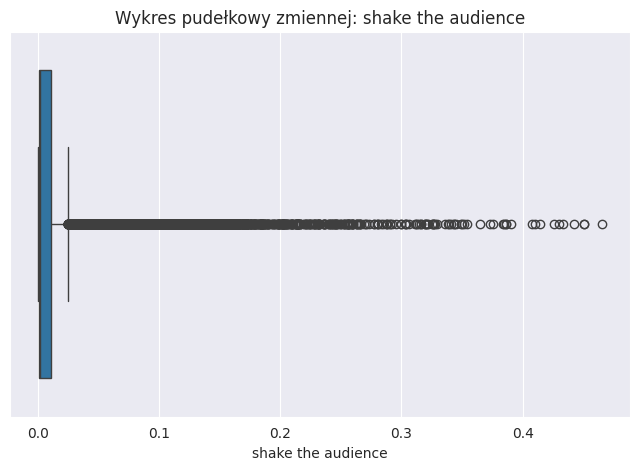

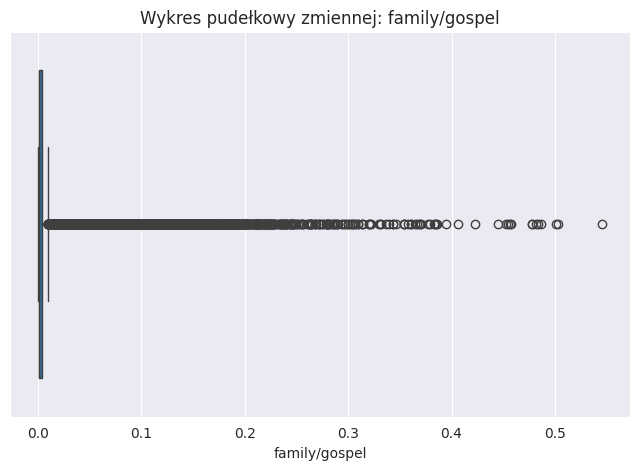

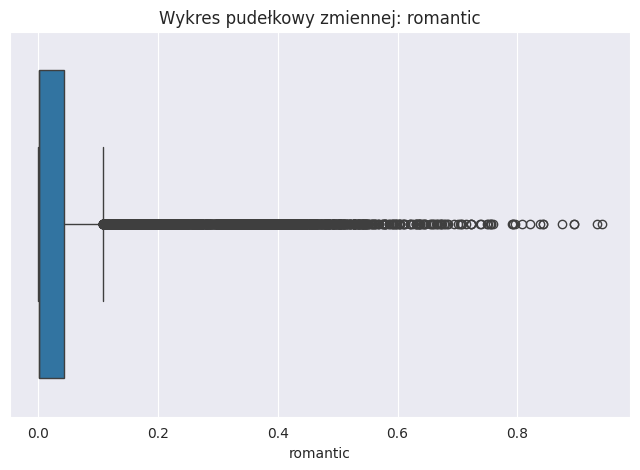

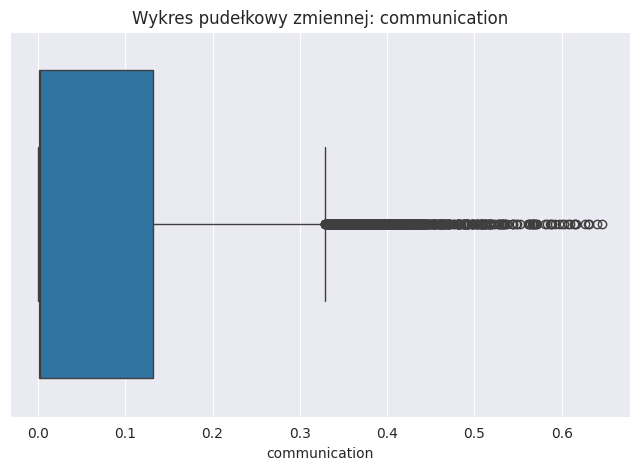

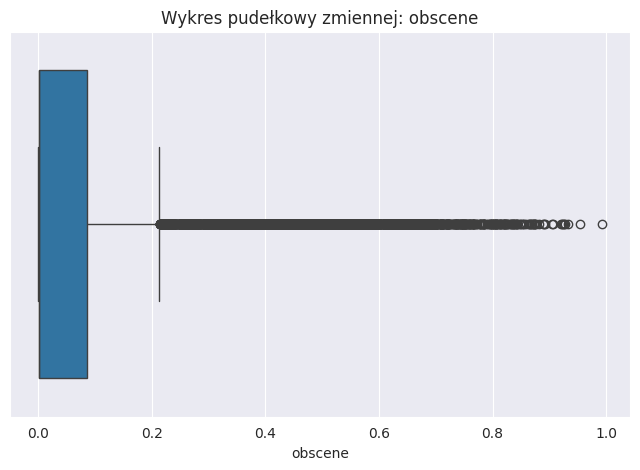

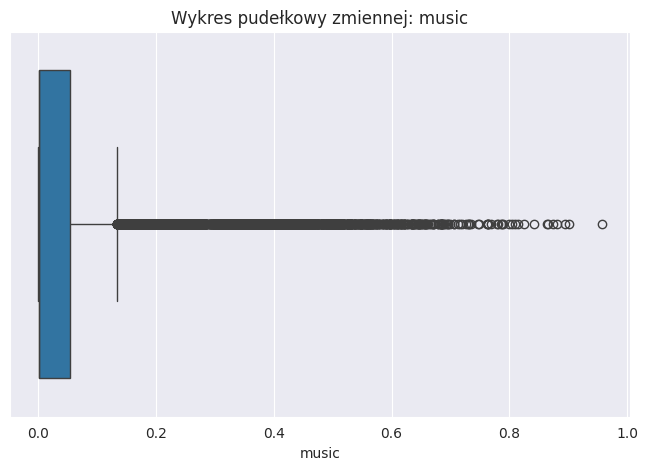

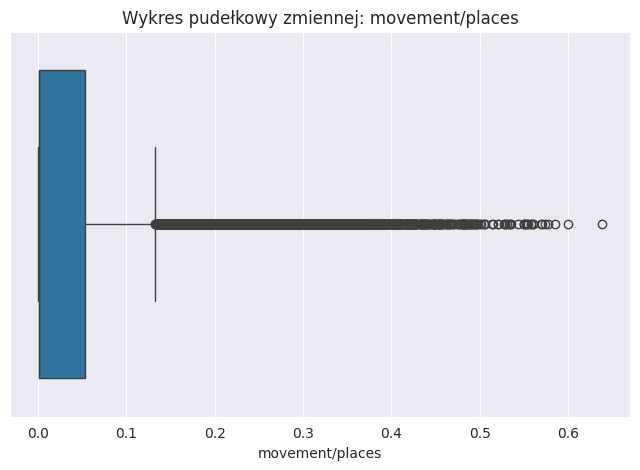

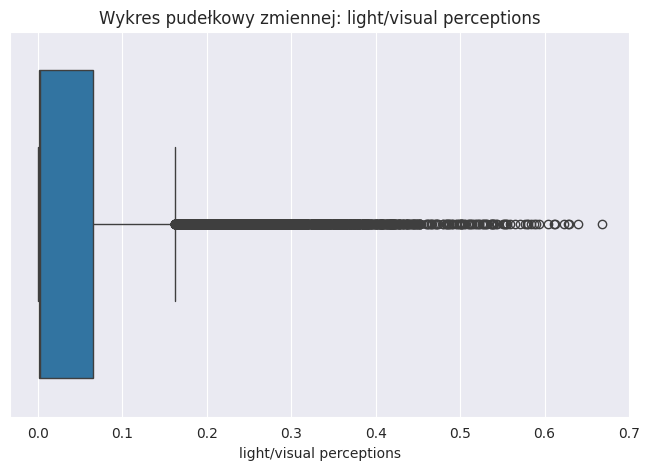

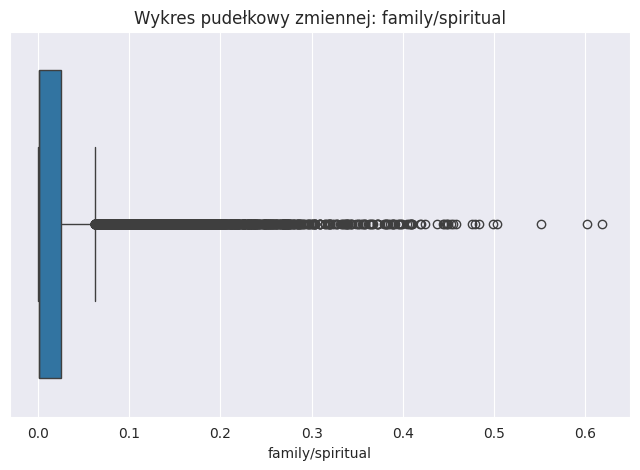

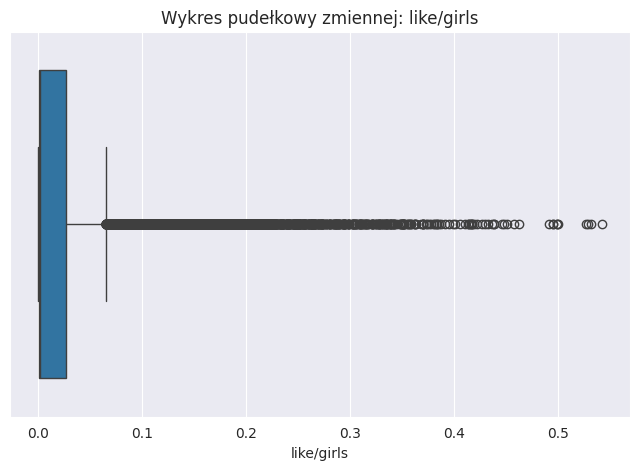

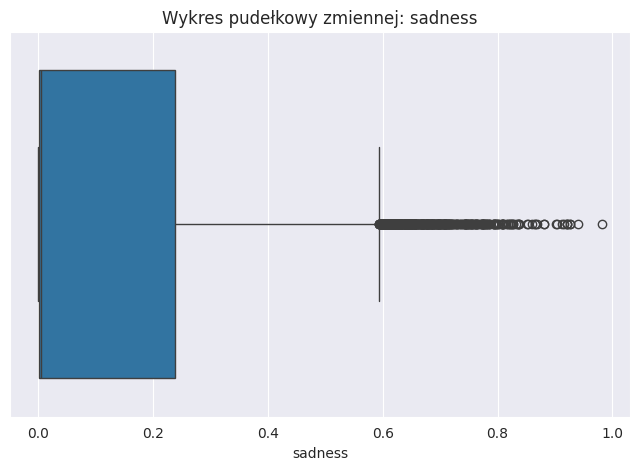

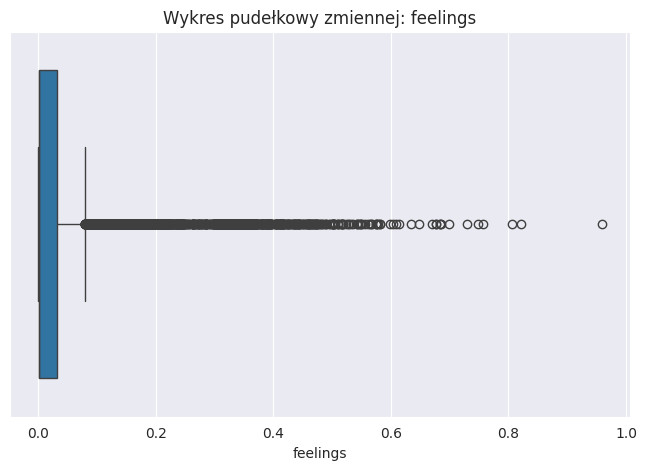

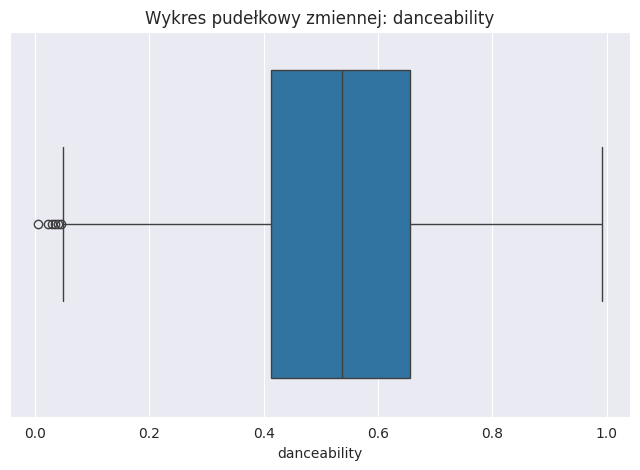

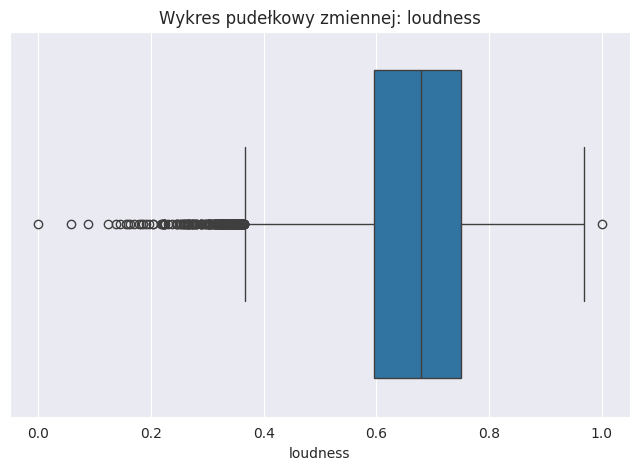

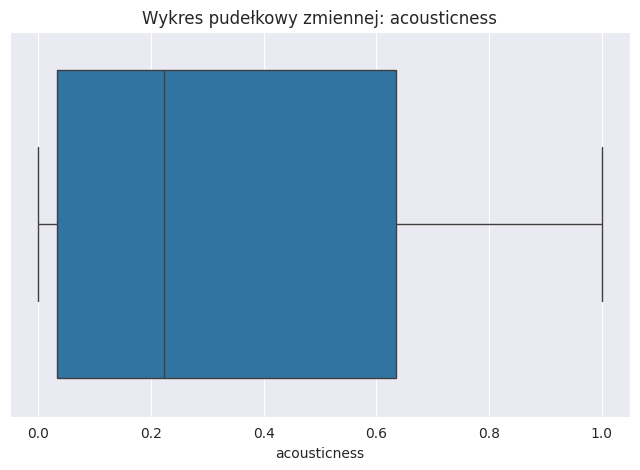

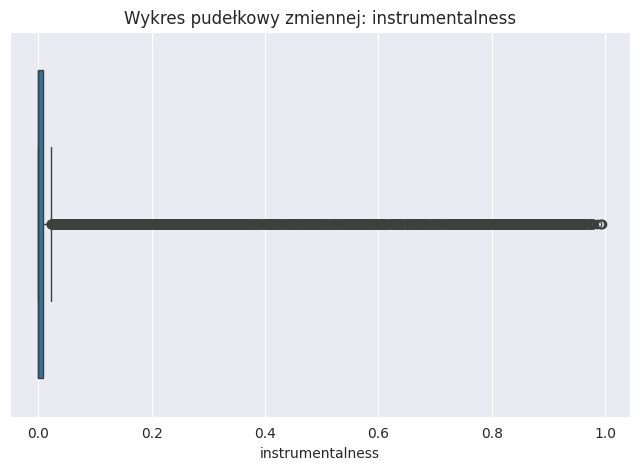

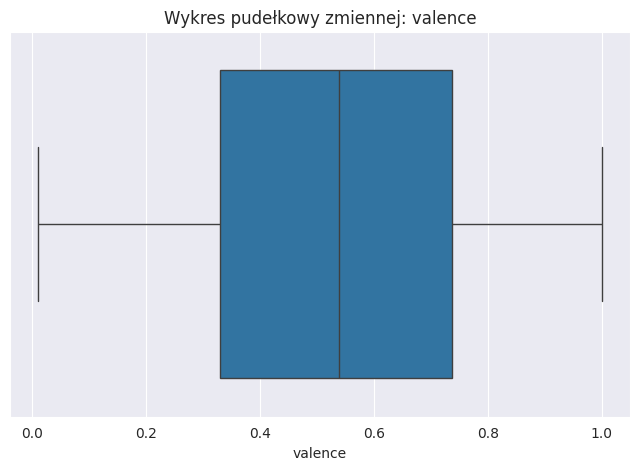

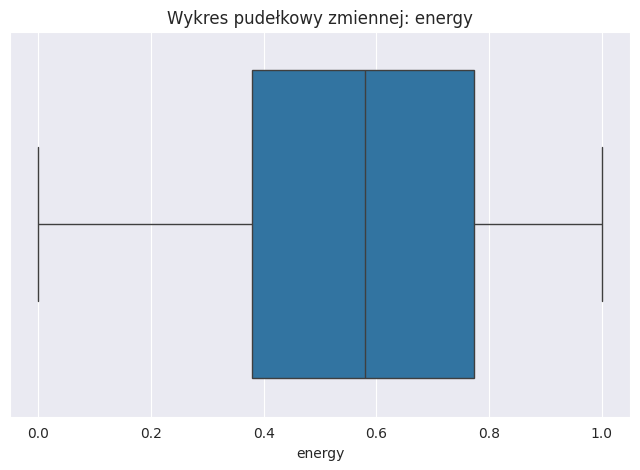

In [4]:
# Import wymaganych bibliotek
import matplotlib.pyplot as plt
import seaborn as sns

# Wyświetlenie podstawowych informacji o zbiorze treningowym
print("\nPodstawowe informacje o danych:")
print(train_data.info())

# Sprawdzenie rozkładów zmiennych numerycznych i kategorycznych
print("\nPodstawowe statystyki zmiennych numerycznych:")
print(train_data.describe())

# Histogramy dla zmiennych numerycznych
print("\nTworzenie histogramów dla zmiennych numerycznych...")
num_columns = train_data.select_dtypes(include=["float64", "int64"]).columns
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f"Rozkład zmiennej: {col}")
    plt.xlabel(col)
    plt.ylabel("Częstość")
    plt.show()

# Wykresy słupkowe dla zmiennych kategorycznych
print("\nTworzenie wykresów słupkowych dla zmiennych kategorycznych...")
cat_columns = train_data.select_dtypes(include=["object"]).columns
for col in cat_columns:
    plt.figure(figsize=(8, 5))
    train_data[col].value_counts().plot(kind="bar")
    plt.title(f"Rozkład zmiennej kategorycznej: {col}")
    plt.xlabel(col)
    plt.ylabel("Liczba wystąpień")
    plt.show()

# Analiza brakujących danych
print("\nAnaliza brakujących danych:")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

# Heatmapa brakujących danych
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmapa brakujących danych")
plt.show()

# Wykresy pudełkowe (boxplot) dla zmiennych numerycznych
print("\nTworzenie wykresów pudełkowych...")
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train_data[col])
    plt.title(f"Wykres pudełkowy zmiennej: {col}")
    plt.xlabel(col)
    plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Identyfikacja zmiennych kategorycznych
categorical_columns = train_data.select_dtypes(include=['object']).columns
print("Znalezione zmienne kategoryczne:", categorical_columns.tolist())

# Zamiana zmiennych kategorycznych na numeryczne za pomocą Label Encoding
label_encoders = {}  # Przechowuje encodery dla każdej kolumny
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le

# Sprawdzenie danych po konwersji
print("\nDane po zamianie zmiennych kategorycznych na numeryczne:")
print(train_data.head())

# Tworzenie kopii danych, aby zachować oryginalne dane
normalized_data = train_data.copy()

# Kolumny do normalizacji
columns_to_normalize = ['release_date', 'len', 'topic']

# Normalizacja wybranych kolumn
scaler = MinMaxScaler(feature_range=(0,1))
normalized_data[columns_to_normalize] = scaler.fit_transform(normalized_data[columns_to_normalize])

# Wyświetlenie przykładowych danych po normalizacji wybranych kolumn
print("\nDane po normalizacji wybranych kolumn (release_date i topic):")
print(normalized_data.head())

# Sprawdzenie zakresów po normalizacji
print("\nZakres wartości po normalizacji:")
for col in columns_to_normalize:
    print(f"{col}: Min = {normalized_data[col].min()}, Max = {normalized_data[col].max()}")



Znalezione zmienne kategoryczne: ['genre', 'topic']

Dane po zamianie zmiennych kategorycznych na numeryczne:
       release_date  genre  len    dating  violence  world/life  night/time  \
18123          1974      3   52  0.029275  0.001053    0.001053    0.363299   
23399          2019      5  106  0.000923  0.416884    0.079951    0.000923   
8743           1975      1   82  0.000993  0.000993    0.422115    0.000993   
26706          2011      6   51  0.001224  0.001224    0.001224    0.001224   
20912          2019      3  158  0.000605  0.062310    0.000605    0.033514   

       shake the audience  family/gospel  romantic  ...  like/girls   sadness  \
18123            0.001053       0.001053  0.063966  ...    0.001053  0.319022   
23399            0.000923       0.000923  0.000923  ...    0.000923  0.064329   
8743             0.000993       0.000993  0.000993  ...    0.000993  0.000993   
26706            0.001224       0.001224  0.001224  ...    0.001224  0.111687   
20912     


Korelacje między zmiennymi (|korelacja| > 0.1):


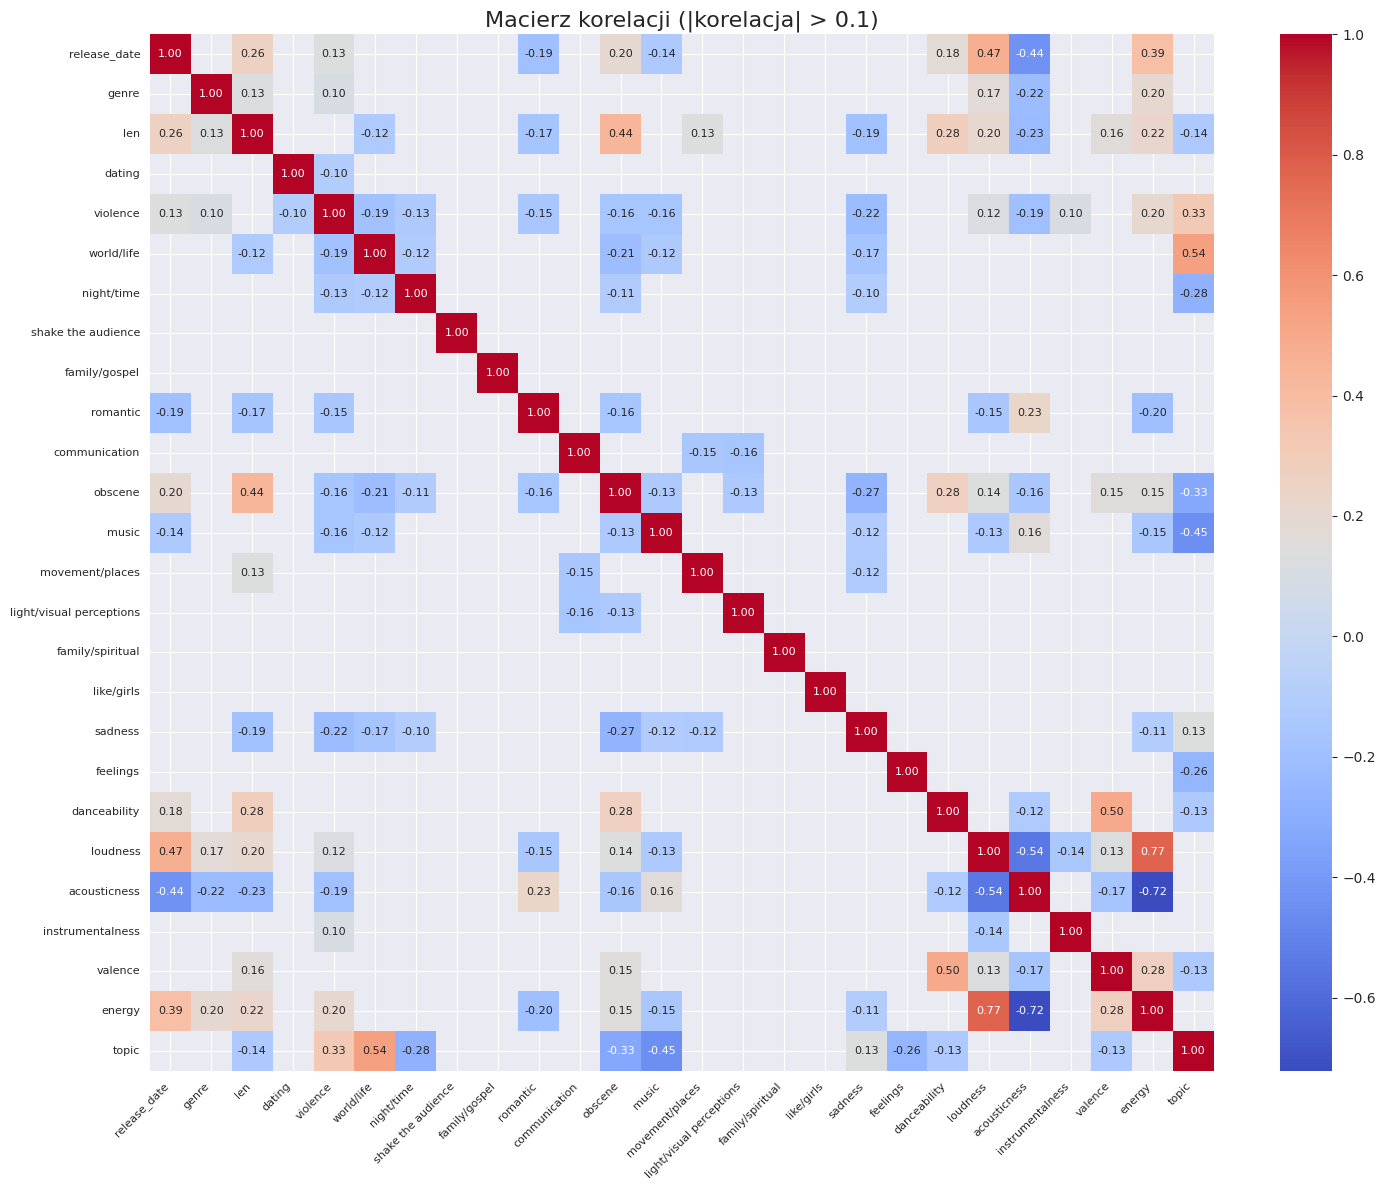

In [6]:
# Korelacje między zmiennymi
threshold = 0.1  # Wybór zakresu dla istotnych korelacji

print(f"\nKorelacje między zmiennymi (|korelacja| > {threshold}):")
correlation_matrix = normalized_data.corr()

# Filtrowanie korelacji
filtered_corr = correlation_matrix[
    (correlation_matrix > threshold) | (correlation_matrix < -threshold)
]

# Wizualizacja macierzy korelacji
plt.figure(figsize=(15, 12))  # Zwiększenie rozmiaru wykresu
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            annot_kws={"size": 8}, mask=filtered_corr.isnull())

# Dostosowanie wyglądu wykresu
plt.xticks(rotation=45, ha="right", fontsize=8)  # Rotacja i zmniejszenie czcionki osi x
plt.yticks(fontsize=8)  # Zmniejszenie czcionki osi y
plt.title(f"Macierz korelacji (|korelacja| > {threshold})", fontsize=16)
plt.tight_layout()
plt.show()


In [9]:
from ydata_profiling import ProfileReport

# Generowanie raportu z automatycznej analizy danych
print("Generowanie raportu...")
profile = ProfileReport(normalized_data, title="Normalized Data Report", explorative=True)

# Zapisanie raportu do pliku HTML
output_file = "normalized_data_report.html"
profile.to_file(output_file)

print(f"Raport został zapisany jako '{output_file}'. Otwórz plik w przeglądarce, aby zobaczyć szczegóły.")


Generowanie raportu...


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

Raport został zapisany jako 'normalized_data_report.html'. Otwórz plik w przeglądarce, aby zobaczyć szczegóły.


In [7]:
from sklearn.model_selection import train_test_split

# Podział normalized_data (70% trening, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    normalized_data.drop(columns=["genre"]),  # Cechy
    normalized_data["genre"],  # Etykiety
    test_size=0.3,
    random_state=42
)


In [8]:
from tpot import TPOTClassifier

# Inicjalizacja TPOT
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=3, random_state=42)

# Trenowanie modelu na zbiorze treningowym
tpot.fit(X_train, y_train)

# Wyświetlenie najlepszego modelu
print("Best pipeline:", tpot.fitted_pipeline_)

# Eksport najlepszego modelu
tpot.export("best_pipeline.py")

# Wyświetlenie 3 najlepszych modeli (ręcznie wyodrębniane)
print("\nTop 3 pipelines (based on internal scoring):")
for i, pipeline in enumerate(tpot.evaluated_individuals_.items()):
    if i >= 3:  # Limit to 3 pipelines
        break
    model_name, model_details = pipeline
    print(f"Model {i + 1}:")
    print(f"Name: {model_name}")
    print(f"Details: {model_details}\n")

/home/filip/pja/inne/PredictMusicGenre/.venv/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/filip/pja/inne/PredictMusicGenre/.venv/lib/python3.12/site-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/home/filip/pja/inne/PredictMusicGenre/.venv/lib/python3.12/site-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
32 operators have been imported by TPOT.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=